In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [6]:
# Import the data
data = pd.read_csv("/content/gdrive/MyDrive/latest_numerai_training_data.csv.xz")

In [7]:
data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,...,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.50
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,...,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,...,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.25
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,...,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.25
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,...,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


In [8]:
# Shape of the data
data.shape

(501808, 314)

In [9]:
data.describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
count,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,...,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000,501808.000000
mean,0.499981,0.499979,0.499979,0.499981,0.499977,0.499977,0.499977,0.499981,0.499980,0.499980,...,0.499982,0.499982,0.499974,0.499980,0.499982,0.499980,0.499974,0.499979,0.499971,0.499997
std,0.353596,0.353593,0.353593,0.353596,0.353587,0.353587,0.353587,0.353596,0.352099,0.352099,...,0.353139,0.353139,0.351328,0.350662,0.352151,0.352965,0.351328,0.347689,0.353419,0.223268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Check for missing data
data.isna().sum()

id                       0
era                      0
data_type                0
feature_intelligence1    0
feature_intelligence2    0
                        ..
feature_wisdom43         0
feature_wisdom44         0
feature_wisdom45         0
feature_wisdom46         0
target                   0
Length: 314, dtype: int64

In [33]:
# Sum of different target present
data.target.nunique()

5

In [34]:

data.target.unique()

array([0.5 , 0.25, 0.75, 0.  , 1.  ])

In [43]:
# Total amount of observation represented by each target
data.target.value_counts()

0.50    251677
0.25    100053
0.75    100045
1.00     25017
0.00     25016
Name: target, dtype: int64

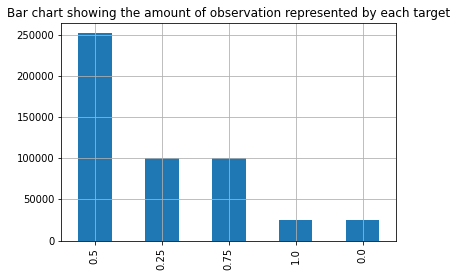

In [38]:
# Bar chart showing the amount of observation represented by each target
data.target.value_counts().plot(kind = 'bar', grid = "True")
plt.title('Bar chart showing the amount of observation represented by each target')
plt.show()

In [42]:
# Percentage amount of observation represented by each target
data.target.value_counts(normalize = True)

# This shows that 50% of the target variable has the value of 0.50, 19% has the value of 0.25,
#  19% has the value of 0.75, 4% has the value of 1.00 and 4% has the value of 0.00

0.50    0.501540
0.25    0.199385
0.75    0.199369
1.00    0.049854
0.00    0.049852
Name: target, dtype: float64

In [29]:

# corr = data.corr()

# # Generate heatmap using seaborn
# sns.heatmap(corr, cmap='coolwarm', annot=True)

# # Show plot
# plt.show()

In [11]:
# Features and target variable
X = data.drop(["id", "era", "data_type"], axis=1)
y = data["target"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
coefficients = lm.coef_

In [15]:
# coefficients

In [16]:
# Sorting the feature coefficients in descending order
indices = np.argsort(abs(coefficients))[::-1]

In [16]:
indices

array([310,  74,  72,  96, 151,  81,  17, 141, 148, 160,   1, 150,   9,
         6, 113, 296, 128,  66,  42, 200,  54,  52, 144, 164,  80, 122,
       268, 218, 194,  64, 158, 146, 192, 224, 201,  23, 115, 147,  51,
       275, 229, 182,  85, 140,   5, 149, 209, 214, 138, 291,  60,   7,
        45, 265, 307, 183, 177,  65, 134,  53, 225, 180, 272, 210,  84,
        91,  29, 254, 281, 277,   8,  47, 136, 191, 257, 166,  55, 222,
        49, 261, 215, 298,  77,  48, 248,  98,  36, 293, 241, 211, 299,
       262, 286, 195, 267, 230, 198, 287, 253, 278, 133, 114,  68, 100,
       250, 308, 153, 167, 232,   2,  86, 112, 173,  70,  92, 190,  10,
        73, 130, 227, 226, 238, 181,  22,  30,  90, 219, 274, 212,  33,
       305, 300,  58,  38, 255,  31, 142, 143, 217,  62, 242, 116, 234,
       302,  87, 121, 236, 123, 132, 108, 104,  15, 246, 127,  63,  24,
       107, 289, 131,  14,  78, 309,  25,  41, 163, 188,  11, 103,  99,
       174, 126, 110,  18, 247, 172, 206, 186, 270, 169,  20, 28

In [17]:
# coefficients

In [17]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], coefficients[indices[f]]))

Feature ranking:
1. feature 310 (1.000000)
2. feature 74 (-0.000000)
3. feature 72 (-0.000000)
4. feature 96 (-0.000000)
5. feature 151 (-0.000000)
6. feature 81 (0.000000)
7. feature 17 (0.000000)
8. feature 141 (-0.000000)
9. feature 148 (-0.000000)
10. feature 160 (-0.000000)
11. feature 1 (0.000000)
12. feature 150 (-0.000000)
13. feature 9 (-0.000000)
14. feature 6 (0.000000)
15. feature 113 (-0.000000)
16. feature 296 (-0.000000)
17. feature 128 (-0.000000)
18. feature 66 (-0.000000)
19. feature 42 (0.000000)
20. feature 200 (-0.000000)
21. feature 54 (0.000000)
22. feature 52 (0.000000)
23. feature 144 (0.000000)
24. feature 164 (-0.000000)
25. feature 80 (-0.000000)
26. feature 122 (0.000000)
27. feature 268 (0.000000)
28. feature 218 (-0.000000)
29. feature 194 (-0.000000)
30. feature 64 (-0.000000)
31. feature 158 (0.000000)
32. feature 146 (0.000000)
33. feature 192 (0.000000)
34. feature 224 (-0.000000)
35. feature 201 (0.000000)
36. feature 23 (-0.000000)
37. feature 115 (

In [18]:
lm.score(x_train, y_train)

1.0

In [19]:
lm.score(x_test, y_test)

1.0

In [20]:
y_pred = lm.predict(x_test)

In [21]:
# Mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.3059312480716956e-31


In [22]:
# Root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4.802011295354995e-16


In [23]:
# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 3.745034338627935e-16


In [31]:
# Comparing the actual outcome and the predicted outcome
predictions_df = x_test['target'].to_frame()
predictions_df["prediction"] = y_pred
predictions_df.head()

,target,prediction
364999,0.25,0.25
127940,0.25,0.25
126744,0.75,0.75
365381,0.25,0.25
300729,0.75,0.75
